In [533]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [534]:
# diffusion of Amp
def diffusion(Amp, D, dt, dx, degradation,size):
    Amp_new = Amp
    for i in range(1, size-1):
        for j in range(1, size-1):
            Amp_new[i,j] = Amp[i,j] + D*dt/dx**2*(Amp[i+1,j]+Amp[i-1,j]+Amp[i,j+1]+Amp[i,j-1]-4*Amp[i,j])
            if Amp_new[i,j] <0:
                Amp_new[i,j] = 0
            Amp_new[i,j]=(1-degradation)*Amp[i,j]
    return Amp_new

In [535]:
# decrease Amp
def deplete(Amp, cell, decrease):
    Amp_new = Amp
    for i in range(len(cell)):
        for j in range(len(cell)):
            Amp_new[i,j] = Amp[i,j] - decrease*cell[i,j]
            if Amp_new[i,j] < 0:
                Amp_new[i,j] = 0
    return Amp_new

In [564]:
# cells growth
def die(cell, Amp, growth_rate, death_rate):
    new_cell = cell
    for i in range(len(cell)):
        for j in range(len(cell)):
            new_cell[i,j] = cell[i,j]*(1+growth_rate-death_rate*Amp[i,j])
            if new_cell[i,j] < 0:
                new_cell[i,j] = 0
    return new_cell

In [537]:
# cell diffusion
def cell_diffuse(cell, velocity, dx, dt, size):
    cell_new=cell
    for i in range(1, size-1):
        for j in range(1, size-1):
            cell_new[i,j] = cell[i,j] + velocity*dt/dx**2*(cell[i+1,j]+cell[i-1,j]+cell[i,j+1]+cell[i,j-1]-4*cell[i,j])
            if cell_new[i,j] <0:
                cell_new[i,j] = 0
    return cell_new

In [545]:
def randomize(data, size):
    for i in range(0,size):
        for j in range(0,size):
            data[i,j]=random.random()
    return data
        

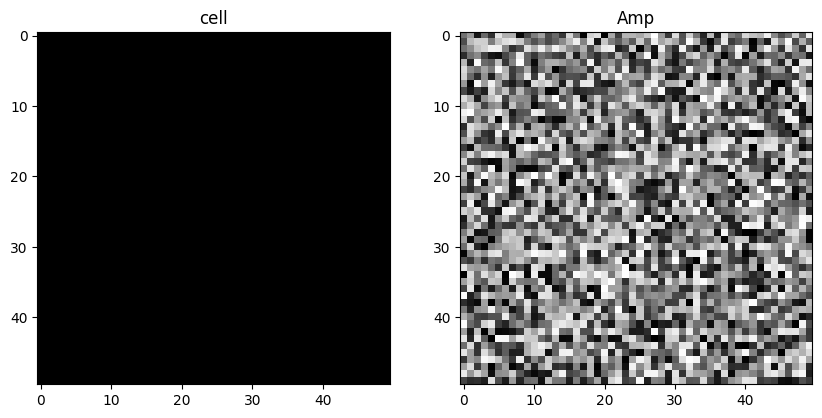

In [575]:
# Set up parameters
D=0.01
dx=1
dt=1
degradation=0.0001
death_rate=1
growth_rate=0.01
decrease=0.1
velocity=0.01

size = 50  # size of the grid
cell=np.ones((size,size))  # cell matrix

Amp=np.zeros((size,size)) # amplitude matrix
Amp[size//2,size//2]=100

#cell=randomize(cell,size)
Amp=randomize(Amp,size)

# show cell and Amp
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cell,cmap='gray')
plt.title('cell')
plt.subplot(1,2,2)
plt.imshow(Amp,cmap='gray')
plt.title('Amp')
plt.show()


All Amp= 878.7774434398316
All cell= 98.4624571743895


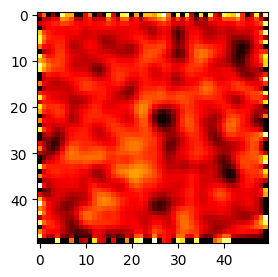

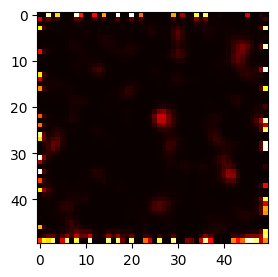

In [587]:
# cell run and die
for i in range(1):
    for step in range(int(10/dt)):
        cell=cell_diffuse(cell, velocity, dx, dt, size)
    cell=die(cell, Amp, growth_rate, death_rate)
    Amp=deplete(Amp, cell, decrease)
    for j in range(int(10/dt)):
        Amp=diffusion(Amp, D, dt, dx, degradation,size)
    
sum=0
# loop through Amp
for i in range(0, len(Amp)):
    for j in range(0, len(Amp[i])):
        sum = sum + Amp[i][j]
print('All Amp=',sum)

sum2=0
# loop through cell
for i in range(0, len(cell)):
    for j in range(0, len(cell[i])):
        sum2 = sum2 + cell[i][j]
print('All cell=',sum2)

#print(cell)

# plot Amp
plt.figure(figsize=(3,3))
plt.imshow(Amp, cmap='hot', interpolation='nearest')
plt.show()

# show cells
plt.figure(figsize=(3,3))
plt.imshow(cell, cmap='hot', interpolation='nearest')
plt.show()